In [269]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# FFT 1D

Sampling parameters

In [270]:
Fs = 150 # sampling rate
Ts = 1.0/Fs # sampling in interval
t = np.arange(0,1,Ts) # time vector

Signal series parameters

In [271]:
ff = 10 #signal frequency
y = np.sin(2*np.pi*ff*t)
n = len(y) # length of the signal vector

#optional
freq = np.fft.fftfreq(n,T/Fs) # calculate set of frequencies of signal with sign(!)
#print(freq)
#print(np.fft.fftshift(freq)) # set frequencies in rigth sequence
#optional


k = np.arange(n) # integer number series since 0  
T = n/Fs

frq = k/T # for multiple frequencies
#print(frq)
#frq = frq[range(int(n/2))] # one side frequency range. Is it equal to fftshift?

FFT

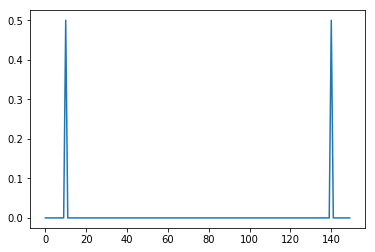

In [272]:
Y = np.fft.fft(y)/n # computing + normalization
#print(Y)
plt.plot(abs(Y)) # frequencies are not symmetrical relative to zero
#Frequencies are not shifted
#plt.plot(abs(Y))

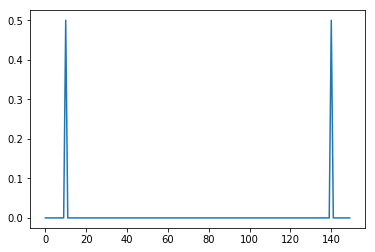

In [277]:
plt.plot(abs(np.fft.fftshift(Y))) # shift zero components to center

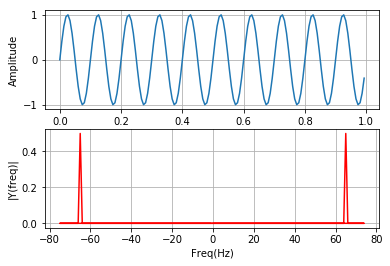

In [279]:
#Y = Y[range(int(n/2))]
Y = np.fft.fftshift(Y)
#frq = np.fft.fftfreq(n, d = T/Fs) it is computed above
frq = np.fft.fftshift(frq)

fig, ax = plt.subplots(2,1)
ax[0].plot(t,y)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amplitude")

ax[1].plot(frq, abs(Y), 'r')
ax[1].set_xlabel('Freq(Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[0].grid()
ax[1].grid()

# Delta function

In [121]:
y = np.zeros((1,n))
y[0,0] = 1

k = np.arange(n)   
T = n/Fs

frq = k/T 
frq = frq[range(int(n/2))] 
Y = np.fft.fft(y[0:])/n 
#print(Y)
#plt.plot(abs(Y)) # 
print(Y.shape)
#Y = Y[range(int(n/2))]

#plt.plot(frq, np.abs(Y), 'r')
#plt.grid()

#Why it does not work?

(1, 150)


# FFT 2D

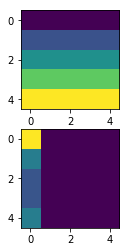

In [122]:
a = np.mgrid[:5, :5][0]
a_fft = np.fft.fft2(a)


fig, ax = plt.subplots(2,1)
ax[0].imshow(a)
ax[1].imshow(np.abs(a_fft))

[-0.42857143 -0.28571429 -0.14285714  0.          0.14285714  0.28571429
  0.42857143] [-0.42857143 -0.28571429 -0.14285714  0.          0.14285714  0.28571429
  0.42857143]


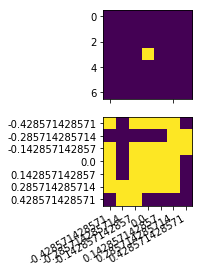

In [144]:
a = np.zeros((7,7))
a[3,3] = 1
a_fft = np.fft.fft2(a)


x_ax = np.fft.fftfreq(a.shape[0], d = 1)
y_ax = np.fft.fftfreq(a.shape[1], d = 1)
x_ax = np.fft.fftshift(x_ax)
y_ax = np.fft.fftshift(y_ax)
print(x_ax, y_ax)

fig, ax = plt.subplots(2,1)
ax[0].imshow(a)
ax[1].imshow(np.abs(a_fft))

plt.xticks(range(len(x_ax)), x_ax)
plt.yticks(range(len(y_ax)), y_ax)

fig.autofmt_xdate()

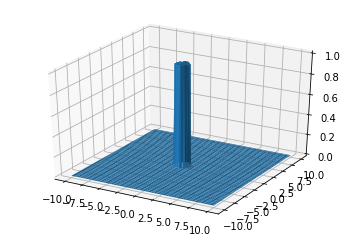

In [213]:
numb_steps = 100
x = np.linspace(-10, 10, numb_steps)
y = np.linspace(-10, 10, numb_steps)

X,Y = np.meshgrid(x,y)

R = 1

Z = np.zeros((100, 100))
# stupid array
for i in range(numb_steps):
    for j in range(numb_steps):
        if x[i]**2+y[j]**2 > R:
            Z[i,j] = 0
        else:
            Z[i,j] = 1
            
            
 
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z)

x_ax = np.fft.fftfreq(Z.shape[0], d = 1)
y_ax = np.fft.fftfreq(Z.shape[1], d = 1)
x_ax = np.fft.fftshift(x_ax)
y_ax = np.fft.fftshift(y_ax)





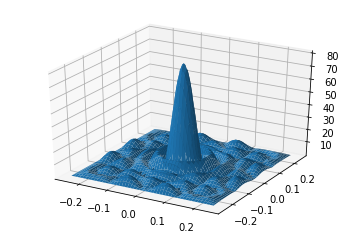

In [280]:
fig = plt.figure()
ax = fig.gca(projection='3d')


Z_fft = np.fft.fft2(Z)
FreqCompRows = np.fft.fftfreq(Z.shape[0],d=2)
FreqCompCols = np.fft.fftfreq(Z.shape[1],d=2)

#print(FreqCompRows, FreqCompCols)
FreqCompRows = np.fft.fftshift(FreqCompRows)
FreqCompCols = np.fft.fftshift(FreqCompCols)

S,D = np.meshgrid(FreqCompRows, FreqCompCols)

ax.plot_surface(S, D, np.abs(np.fft.fftshift(Z_fft))) # WTF?


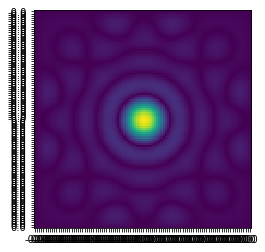

In [231]:
Z_fft = np.fft.fft2(Z)
FreqCompRows = np.fft.fftfreq(Z.shape[0],d=2)
FreqCompCols = np.fft.fftfreq(Z.shape[1],d=2)
FreqCompRows = np.fft.fftshift(FreqCompRows)
FreqCompCols = np.fft.fftshift(FreqCompCols)

plt.xticks(range(len(x_ax)), np.round(x_ax))
plt.yticks(range(len(y_ax)), np.round(y_ax))

plt.imshow(np.abs(np.fft.fftshift(Z_fft)))

fig.autofmt_xdate()